In [29]:
# import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
# Load dataset
df = pd.read_csv("C:/Users/Bhuvaneshwari/Downloads/synthetic_food_dataset_imbalanced.csv")
df


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


In [31]:
# to check first five rows
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [32]:
# overview
df.shape

(31700, 16)

In [33]:
# getting columns
df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [34]:
# Info about data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [35]:
# describe the dataset
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [36]:
#check missing values
df.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

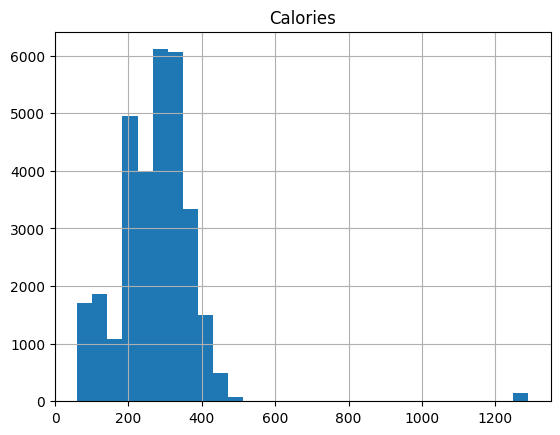

In [37]:
# vizualising a column
df['Calories'].hist(bins=30)
plt.title('Calories')
plt.show()

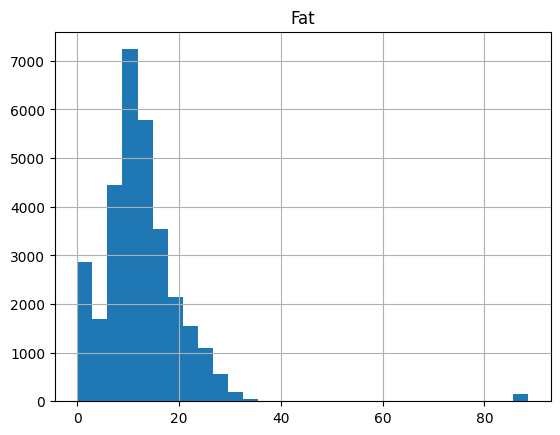

In [38]:
df['Fat'].hist(bins=30)
plt.title('Fat')
plt.show()

In [39]:
# filling missing values with median
df = df.fillna(df.median(numeric_only=True))

In [40]:
df.isnull().sum().sum()

np.int64(0)

In [41]:
# checking duplicates
df.duplicated().sum()

np.int64(313)

In [42]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [43]:
# dropping unwanted column
df.drop('Food_Name',axis = 1,inplace = True)

In [44]:
df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'],
      dtype='object')

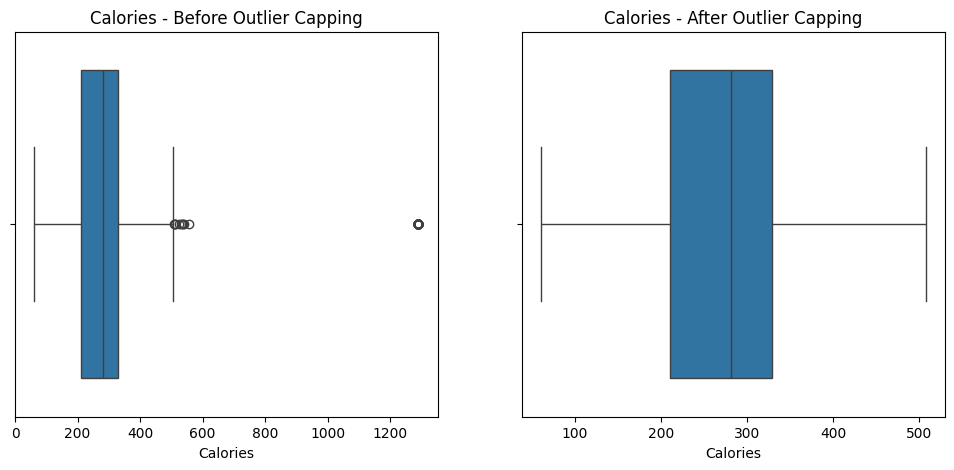

In [45]:
# Copy original column before capping
df_before = df.copy()

# Capping outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                  np.where(df[column] > upper, upper, df[column]))

cap_outliers(df, 'Calories')

# Visualizing before and after capping for calories column
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_before['Calories'])
plt.title("Calories - Before Outlier Capping")

plt.subplot(1,2,2)
sns.boxplot(x=df['Calories'])
plt.title("Calories - After Outlier Capping")

plt.show()


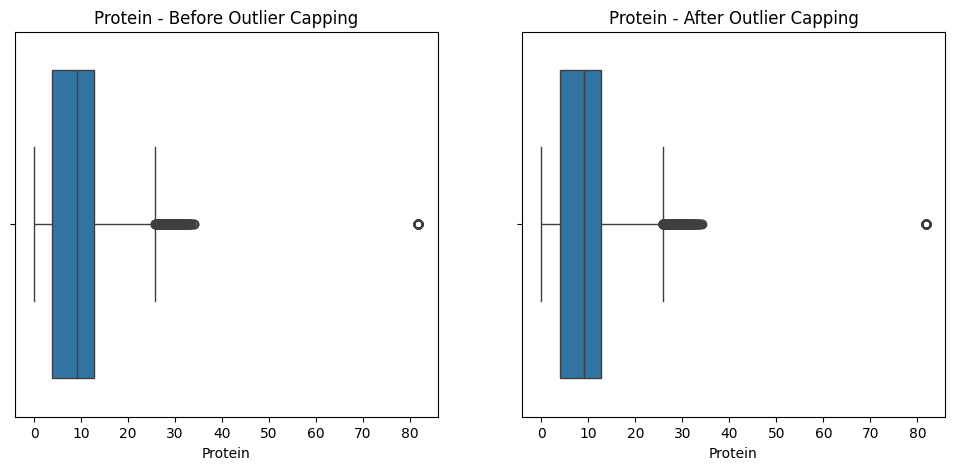

In [46]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_before['Protein'])
plt.title("Protein - Before Outlier Capping")

plt.subplot(1,2,2)
sns.boxplot(x=df['Protein'])
plt.title("Protein - After Outlier Capping")

plt.show()


In [47]:
# Capping outliers for all numeric columns
for col in df.select_dtypes(include=['float64']).columns:
    cap_outliers(df, col)

print("Outliers capped successfully")


Outliers capped successfully


In [48]:
# Encode target column
le = LabelEncoder()
df['Meal_Type'] = le.fit_transform(df['Meal_Type'])

# One-hot encode the preparation method
df = pd.get_dummies(df, columns=['Preparation_Method'], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Encoding & scaling done!")
df.head()

✅ Encoding & scaling done!


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Is_Vegan,Is_Gluten_Free,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,0.243520,0.836749,0.317656,0.735682,-0.531377,-0.402021,1.148336,-0.007100,1.142990,-0.092108,1.089942,1,False,False,True,False,False
1,-0.648228,-0.823692,-0.073232,-0.724253,1.253716,-1.276747,-0.925378,0.536603,0.274922,0.247719,-1.023919,3,False,True,False,False,True
2,0.704439,0.834584,1.181751,0.034357,-0.310853,-0.776398,1.204276,0.566685,-0.227055,-0.541627,1.121949,3,False,False,False,False,True
3,-0.814990,0.045687,-1.022364,0.351692,-0.817029,-0.086344,-0.093798,0.198478,0.214884,0.862291,-0.304975,2,False,True,True,False,False
4,0.060587,-0.496977,0.642501,0.067981,1.409472,-0.270756,-0.109681,-0.566907,0.337043,-1.106943,-1.718809,3,False,False,False,False,False



🔹 Logistic Regression 🔹
Accuracy: 0.2635
              precision    recall  f1-score   support

           0       0.26      0.32      0.29      1575
           1       0.27      0.09      0.13      1560
           2       0.28      0.21      0.24      1558
           3       0.26      0.43      0.32      1585

    accuracy                           0.26      6278
   macro avg       0.27      0.26      0.25      6278
weighted avg       0.27      0.26      0.25      6278


🔹 Decision Tree 🔹
Accuracy: 0.2504
              precision    recall  f1-score   support

           0       0.26      0.26      0.26      1575
           1       0.26      0.26      0.26      1560
           2       0.24      0.23      0.24      1558
           3       0.25      0.25      0.25      1585

    accuracy                           0.25      6278
   macro avg       0.25      0.25      0.25      6278
weighted avg       0.25      0.25      0.25      6278


🔹 Random Forest 🔹
Accuracy: 0.2522
              pr

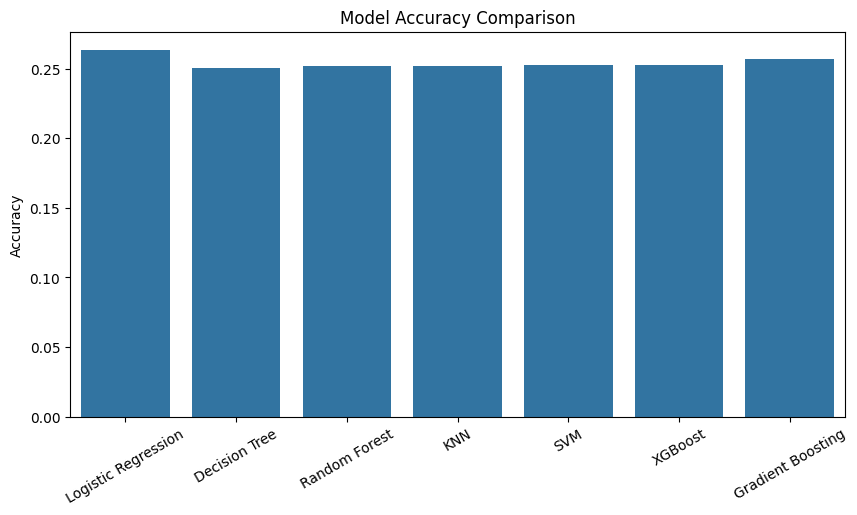

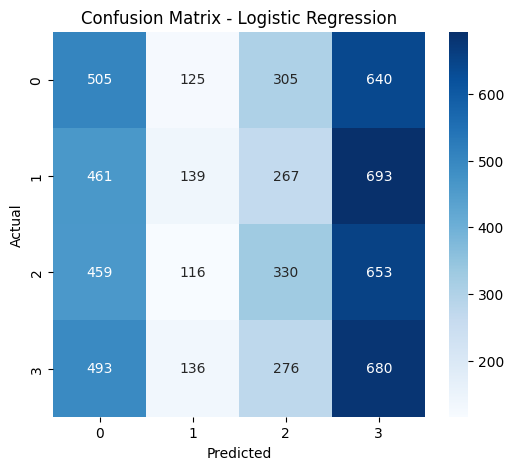


 Best Performing Model: Logistic Regression with Accuracy = 0.26


In [49]:
# Train-test split

X = df.drop('Meal_Type', axis=1)
y = df['Meal_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and Evaluate

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))

# Compare model performance visually

plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

# Confusion Matrix for Best Model

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"\n Best Performing Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")


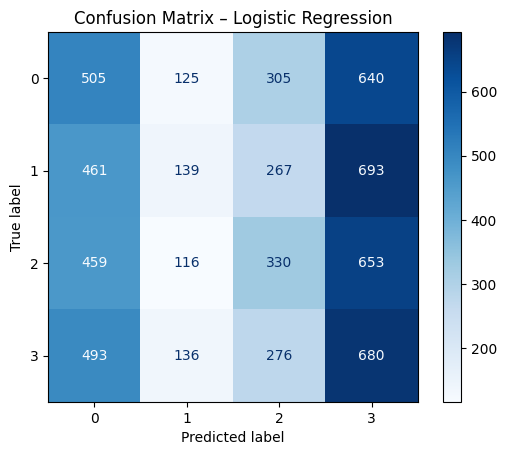

,precision,recall,f1-score,support
0,0.263295,0.320635,0.289150,1575.00000
1,0.269380,0.089103,0.133911,1560.00000
2,0.280136,0.211810,0.241228,1558.00000
3,0.255064,0.429022,0.319925,1585.00000
accuracy,0.263460,0.263460,0.263460,0.26346
macro avg,0.266969,0.262642,0.246053,6278.00000
weighted avg,0.266908,0.263460,0.246452,6278.00000


In [50]:
# Step 5: Model Evaluation and Insights

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix (visual)
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f"Confusion Matrix – {best_model_name}")
plt.show()

# Classification Report (detailed view)
report = classification_report(y_test, best_model.predict(X_test), output_dict=True)
pd.DataFrame(report).transpose()


In [51]:
# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    features = X.columns
    fi = pd.DataFrame({'Feature': features, 'Importance': importance})
    fi = fi.sort_values('Importance', ascending=False).head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=fi)
    plt.title(f'Top 10 Important Features – {best_model_name}')
    plt.show()


**Conclusion:**
The nutriClass project successfully classified food items based on their nutritional values.
After evaluating multiple models, "Logistic Regression" achieved the best accuracy of 0.2635.
This demonstrates that nutrient-based features can effectively predict food categories, providing a foundation for dietary recommendation and nutrition-tracking applications.